In [39]:
# Import Dependencies
import json
import tweepy 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time 

In [40]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [41]:
# Import Twitter API Keys
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [42]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [43]:
# News Organization accounts 
news_organizations = "@CNN", "@BBC", "@CBS", "@FoxNews", "@nytimes"

# Variables for holding sentiments and setting counter
sentiments = []
counter = 1 

# Loop through tweets
for organization in news_organizations:
    tweet_number = 1

    # Get all tweets from home feed
    public_tweets = api.user_timeline(organization, count=100)

    # Loop through all tweets
    for tweet in public_tweets:
        print("Tweet %s: %s" % (counter, tweet["text"]))

        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        #Append into sentiment  
        sentiments.append({"Tweets Ago": tweet_number,
                          "Media Sources": organization,
                          "Text":tweet["text"],
                          "Date": tweet["created_at"],
                          "Compound": compound,
                          "Positive": pos,
                          "Neutral": neu,
                          "Negative": neg,
                           })
        tweet_number +=1
        counter +=1

Tweet 1: New Trump adviser is "not much of a carrot man" https://t.co/Z53CxQc8cE | via @CNNopinion https://t.co/RRtck6hC7Z
Tweet 2: "Fittest woman on earth" wins gold medal after family tragedy https://t.co/tn9oLryfxc https://t.co/oQe1NTxvTS
Tweet 3: This 16-year-old from India won the 10-meter air pistol competition despite only picking up a pistol for the first… https://t.co/kOCqrBlxW5
Tweet 4: Sebastian Vettel wins Bahrain Grand Prix after mechanic hit by Ferrari car https://t.co/Qb23kgLrJs https://t.co/BPZQKJj82e
Tweet 5: Muenster van attack driver acted alone, police say https://t.co/P36RmkLlJf https://t.co/DLIIHURxvF
Tweet 6: Seven US service members died in four noncombat-related air crashes in just four days, prompting concern over readi… https://t.co/hilVAfsHUW
Tweet 7: Former Joint Chiefs chairman worries about generals in President Trump's White House https://t.co/v1RGxKgrRW https://t.co/dSptKGHJ06
Tweet 8: The countries with the two biggest economies are threatening huge ta

Tweet 101: 😺💦 This is Maya the jaguar's very first swim!  
#BigCatsAboutTheHouse https://t.co/IacZP3ltf3
Tweet 102: 😂 Need a hand getting the kids to bed? https://t.co/JAUkyoVSA8
Tweet 103: 'Silencing masks' and 'wife auctions': What life used to be like for women. 
👉 https://t.co/7Z1bcXKgOx https://t.co/gzm7Hf3loH
Tweet 104: 🦖😂 Philomena Cunk examines the barbaric conditions in which we keep today's dinosaurs.
#CunkOnBritain  https://t.co/nBav5dqh7a
Tweet 105: RT @bbcgetinspired: Meet Sue...

She is planning to run the 2018 @LondonMarathon to prove someone with vascular dementia can do it. 🙌

➡ ht…
Tweet 106: 🎨 Victoria Lomasko is a Russian graphic artist who's travelled up and down her country painting 'forgotten women'. https://t.co/XtlpBlAYb0
Tweet 107: 🎶 The search for the next Young Musician has begun, and the first @BBCYoungMus semi-finalist of 2018 has been confi… https://t.co/klUA4GWtb0
Tweet 108: 'If boys are getting diagnosed with autism, girls need exactly the same.' https:

Tweet 201: @OldDominion's Matthew Ramsey is here with a friendly reminder - Country Music’s Party Of The Year® is just seven d… https://t.co/SFnXxQLoPN
Tweet 202: It's time to celebrate! @MomCBS will be back back for Season 6! https://t.co/ianxp6JWHq
Tweet 203: It all comes down to this! Stream Round 4 of #TheMasters Tournament on CBS live with a free trial of CBS All Access… https://t.co/mNFSAUkLvZ
Tweet 204: @reba is ready for her hosting duties! In just one week, watch her take the stage at the 53rd #ACMawards. Tune in A… https://t.co/TmjezmqPme
Tweet 205: Watch some of the biggest names in golf compete in one of the greatest tournaments of the year! Stream #TheMasters… https://t.co/e8kbkSLx5k
Tweet 206: Tonight's the night! Here's a behind-the-scenes look at season 2 of @RansomCBS before the big premiere. Tune in at… https://t.co/WtRHvufO7H
Tweet 207: What song will @DierksBentley belt out when he takes the stage to perform at the 53rd #ACMawards? Get ready to sing… https://t.co/oE

Tweet 301: #Trump warns Assad: 'Big price to pay' for fatal Syria attack https://t.co/89YDwXM5Cv
Tweet 302: #Trump national security spokesman Michael Anton to leave the @WhiteHouse https://t.co/QcwMRiCZho
Tweet 303: Anheuser-Busch debuts summery new Bud Light Orange https://t.co/OdJArWGqI9
Tweet 304: Sketch released in severed head case in Texas, man sought https://t.co/zrgu5aWc0O
Tweet 305: Gas prices jump to $2.74 per gallon https://t.co/tjCwMlwaDI
Tweet 306: Manhunt for Tennessee man, 23, who admits he killed his mother and his friend https://t.co/wsxEPP5w36
Tweet 307: Lyft driver abandons pilot in parking lot after learning he would only make $6 on ride https://t.co/lKigZYnIia
Tweet 308: OPINION: Has the California backlash against liberal craziness finally begun? https://t.co/qfrnE8DGds
Tweet 309: London Mayor Sadiq Khan targets knives as murder rate spikes: 'There is never a reason to carry a knife' https://t.co/NY8C3D3NPy
Tweet 310: Florida woman caught with cocaine in purse bl

Tweet 401: North Korea Said to Offer Direct Assurance It Will Discuss Denuclearization https://t.co/OB39Xfk3wD
Tweet 402: The snow monkeys of Japan like a nice warm bath. Scientists wanted to find out the real reason they sought out the… https://t.co/Wg61NYzLII
Tweet 403: A Town That Lives for Hockey Is Devastated by Humboldt Broncos’ Deaths https://t.co/fkUbNvxLpe
Tweet 404: Facebook's advice to Mark Zuckerberg as he prepares to appear before Congress: Be humble, agreeable and as forthrig… https://t.co/vqSgPJGcqe
Tweet 405: Paleontologists have discovered dozens of jumbo-size footprints belonging to dinosaurs that lived 170 million years… https://t.co/AciKlSwvNA
Tweet 406: Facebook's advice to Mark Zuckerberg as he prepares to appear before Congress: Be humble, agreeable and as forthrig… https://t.co/dbYIfSGCCM
Tweet 407: He killed a Red Cross worker, and the motive is still a mystery: "I will go to hell for what I did" https://t.co/6pCS8rSFVJ
Tweet 408: A Tough Task for Facebook: Eur

In [44]:
# Convert sentiments to DataFrame and view top five
sentiments_df = pd.DataFrame(sentiments)
sentiments_df = sentiments_df[["Tweets Ago",
                               "Text",
                               "Media Sources",
                               "Date",
                               "Compound",
                               "Positive",
                               "Neutral",
                               "Negative",]]
sentiments_df.head()

,Tweets Ago,Text,Media Sources,Date,Compound,Positive,Neutral,Negative
0,1,"New Trump adviser is ""not much of a carrot man...",@CNN,Mon Apr 09 01:00:13 +0000 2018,0.0000,0.000,1.000,0.000
1,2,"""Fittest woman on earth"" wins gold medal after...",@CNN,Mon Apr 09 00:50:07 +0000 2018,0.3400,0.337,0.446,0.218
2,3,This 16-year-old from India won the 10-meter a...,@CNN,Mon Apr 09 00:41:08 +0000 2018,0.5719,0.171,0.829,0.000
3,4,Sebastian Vettel wins Bahrain Grand Prix after...,@CNN,Mon Apr 09 00:30:09 +0000 2018,0.7717,0.358,0.642,0.000
4,5,"Muenster van attack driver acted alone, police...",@CNN,Mon Apr 09 00:21:05 +0000 2018,-0.6249,0.000,0.611,0.389


In [45]:
# Amount of information in data frame
sentiments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Tweets Ago       500 non-null int64
Text             500 non-null object
Media Sources    500 non-null object
Date             500 non-null object
Compound         500 non-null float64
Positive         500 non-null float64
Neutral          500 non-null float64
Negative         500 non-null float64
dtypes: float64(4), int64(1), object(3)
memory usage: 31.3+ KB


In [46]:
# Saving the DataFrame into a csv file
sentiments_df.to_csv("twitter_sentiments.csv", index = False )

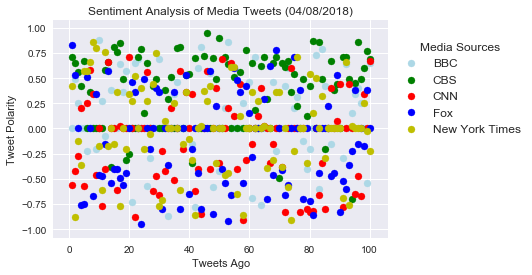

In [32]:
# Gathering the information from each media sources
BBC = sentiments_df.loc[sentiments_df["Media Sources"] == "@BBC"]
CBS = sentiments_df.loc[sentiments_df["Media Sources"] == "@CBS"]
CNN = sentiments_df.loc[sentiments_df["Media Sources"] == "@CNN"]
FOX = sentiments_df.loc[sentiments_df["Media Sources"] == "@FoxNews"]
NYT = sentiments_df.loc[sentiments_df["Media Sources"] == "@nytimes"]

# Creating scatter plots
plt.scatter(BBC['Tweets Ago'], BBC['Compound'], c ='lightblue', marker="o", label = 'BBC')
plt.scatter(CBS['Tweets Ago'], CBS['Compound'], c ='g', marker="o", label = 'CBS')
plt.scatter(CNN['Tweets Ago'], CNN['Compound'], c ='r', marker="o", label = 'CNN')
plt.scatter(FOX['Tweets Ago'], FOX['Compound'], c ='b', marker="o", label = 'Fox')
plt.scatter(NYT['Tweets Ago'], NYT['Compound'], c ='y', marker="o", label = 'New York Times')

# Plotting title and labels, and saving the figure into a png
sns.set()
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%m/%d/%Y")))
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.legend(bbox_to_anchor=(1, 0.95), title='Media Sources', fontsize = 'medium')
plt.savefig("Sentiment Analysis of Media Tweets.png", bbox_inches = "tight")
sns.set
plt.show()

In [35]:
# Creating and displaying a new dataframe to group by Media Source and Compound score
new_score = pd.DataFrame(sentiments_df.groupby("Media Sources")["Compound"].mean())
new_score

,Compound
Media Sources,
@BBC,0.091746
@CBS,0.369603
@CNN,-0.104294
@FoxNews,-0.119509
@nytimes,0.005415


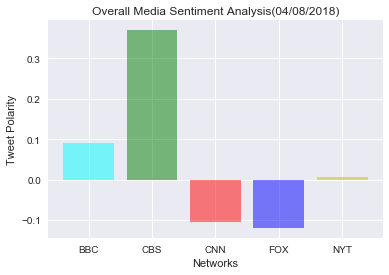

In [47]:
# Gathering and plotting of the compound score by news outlet and saving the image into png
x_axis = np.arange(len(new_score["Compound"]))
compound_score = new_score["Compound"]
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "FOX", "NYT"])
plt.bar(x_axis, compound_score, color = ['cyan','g','r','b','y'], alpha=0.5, align="edge")
plt.xlabel("Networks")
plt.ylabel("Tweet Polarity")
plt.title("Overall Media Sentiment Analysis(%s)" % (time.strftime("%m/%d/%Y")))
plt.savefig("Overall Media Sentiment Analysis.png", bbox_inches = "tight")
sns.set()
plt.show()